<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_p_183~227_(201~211_%EC%A0%9C%EC%99%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **분류**
### 1.분류개요
* 지도학습은 레이블, 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식으로, 분류는 지도학습의 대표적 예이다.
* 학습데이터로 주어진 데이터의 피처와 레이블 값을 머신러닝 알고리즘으로 학습해 모델을 생성하고 미지의 레이블 값을 예측한다.
* 분류는 다양한 머신러닝 알고리즘으로 구현할 수 있다.
> * 나이브 베이즈
> * 로지스틱회귀
> * 규칙기반 결정트리
> * 서포트 벡터 머신
> * 최소근접 알고리즘
> * 심층연결 기반 신경망
> * 앙상블
* #### 앙상블
> * 정형 데이터의 예측 분석에서 높은 예측 성능을 보이는 분류방식
> * 같은/다른 알고리즘을 결합하는데, 대부분은 동일한 알고리즘을 결합한다.
> * 배깅(Bagging)-랜덤포레스트: 예측성능, 수행시간, 유연성면에서 뛰어난 성능을 보임
> * 부스팅(Boosting)-그래디언트 부스팅: 뛰어난 예측성능, but수행시간이 너무 오래걸림, 최적화 모델튜닝이 어려움
> * XGBoost, LightGBM :그래디언트 부스팅의 예측성능을 발전시키고 시간도 단축시킨 알고리즘
> * 스태킹: 앙상블의 앙상블

### 결정트리
* ML알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
* 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류규칙을 만드는 것.
* 규칙노드: 규칙조건이 되는 구조
* 서브트리: 새로운 규칙조건마다 생성
* 정보 균일도 측정 방법- 정보이득지수, 지니계수
> * 정보이득:엔트로피 개념기반, 서로 다른 값이 섞여있으면 엔트로피가 높고 같은값이 섞여있으면 엔트로피가 낮다. 1-엔트로피지수, 정보이득이 높은 속성을 기준으로 분할
> * 지니계수: 불평등지수를 나타낼때 사용. 0이 평등, 1이 불평등. 지니계수가 낮을수록 데이터의 균일도가 높은것. 
#### 1.결정트리 모델의 특징
* 균일도 기반이라 알고리즘이 직관적이다.
* 균일도만 신경쓰면되므로 특별한 경우를 제외하고는 전처리작업이 필요없다. 
* 과적합으로 정확도가 떨어지는 단점이 있다.
#### 2.결정트리 파라미터
* DecisionTreeClassifier, DecisionTreeRegressor
#### 3.결정트리 모델의 시각화
* Graphviz패키지 사용: 그래프기반 dot파일로 기술된 이미지 시각화 패키지
* export_graphviz() API제공

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier생성
dt_clf=DecisionTreeClassifier(random_state=156)

# 붓꽃데이터를 로딩하고 학습과 테스트데이터세트로 분리
iris_data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

#DecisionTreeClassifier학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

사이킷런 트리모듈은 Graphviz를 사용하기위해 export_graphviz() 함수를 제공한다. 인자로 학습이 완료된 estimator, output파일명, 결정클래스의 명칭, 피처의 명칭을 입력해준다.

In [2]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출로 out_file로 지정된 tree.dot파일을 생성함.
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names, feature_names=iris_data.feature_names,impurity=True,filled=True)

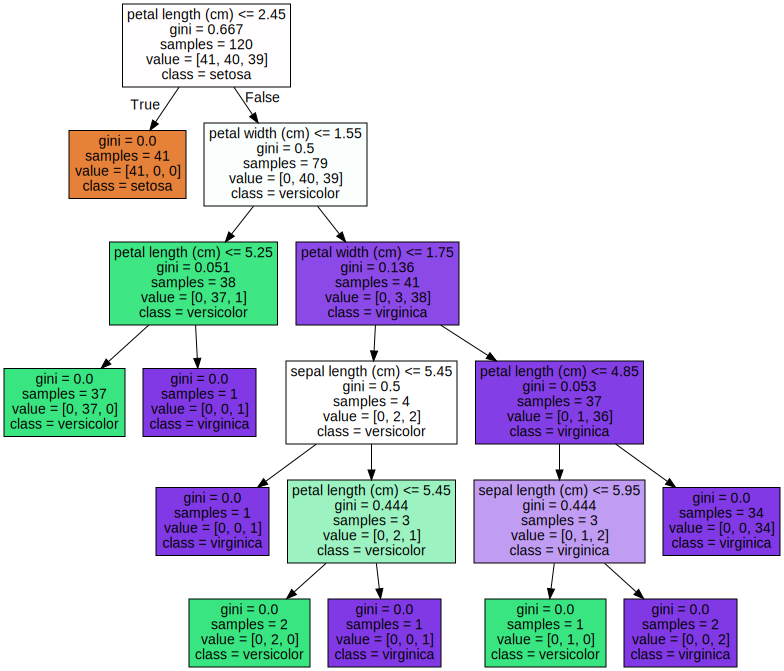

In [3]:
import graphviz
#위에서 생성된 tree.dot파일을 Graphviz가 읽어서 시각화
with open("tree.dot")as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

* 리프노드: 더이상 자식노드가 없는 노드, 최종클래스값이 결정되는노드
* 브랜치노드: 자식노드가 있는 노드
> * petal length(cm)<=2.45: 피처의 조건이 있는것은 자식노드를 만들기 위한 규칙조건
> * gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니계수
>* samples는 현 규칙에 해당하는 데이터 건수
>* values=[] 는 클래스 값 기반의 데이터건수. 클래스 값으로 0,1,2를 가지고 있다.

> **1번노드**
> * samples=120 :전체 데이터가 120개
> * Value=[41,40,39] 는 0이 41개, 1이 10개, 2가 39개라는 뜻 
>* sample120개가 value=[41,40,39]라면 지니계수는 0.667
>* petal length(cm)<=2.45 규칙으로 자식노드 생성
>* class=setosa는 하위노드를 가질경우 setosa의 개수가 41개로 가장 많다는 뜻

>**2번노드**
>* 모든 데이터가 Setosa로 결정되는 리프노드
>* 41개 샘플 데이터 모두 Setosa이므로 예측 클래스는 Setosa로 결정
>* 지니계수는 0

>**3번노드**
>* petallength(cm)<=2.45가 False인 규칙노드
>* 79개 샘플중 Vesicolor 40개, Virginica 39개로 지니계수는 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙필요

>**4번노드**
>* petallength(cm)<=1.55가 True인 규칙노드
>* 38개의 샘플데이터중 Vericolor 37개, Virginica 1개로 대부분이 Vericolor.
>* 지니계수는 0.051로 낮으나 Versicolor과 Virginica가 혼재되어 있으므로 petal length<=5.25라는 새로운 규칙으로 다시 자식노드생성

>**5번노드**
>* petallength(cm)<=1.55가 False인 규칙노드
>* 지니계수는 낮으나 여전히 Versicolor과 Virginica가 혼재되어있으므로 petal width(cm)<=1.75라는 새로운 규칙으로 다시 자식노드 생성

* 각노드의 색깔은 붓꽃 데이터의 레이블 값을 의미한다. 주확색은 0:Setosa, 초록색은 1:Versicolor, 보라색은 2:Virginica 레이블을 나타낸다.
* 색이 짙어질수록 지니계수가 낮고 해당 레이블에 속하는 샘플데이터가 많다.

**하이퍼파라미터 변경경**
>* max_depth 하이퍼 파라미터 변경 : 결정트리의 최대 트리 깊이를 제어한다.
>* max_depth를 제한 없음에서 3개로 설정하면 트리 깊이가 설정된 max_depth에 따라 줄어들면서 더 간단한 결정트리가 된다.
>* min_samples_split 하이퍼 파라미터 변경: 자식 규칙노드를 분할해 만들기 위한 최소한의 샘플데이터 개수
>* 4로 설정했을때 3개 이하로남았을 경우 더이상 분할을 진행하지 않는다.
>* min_samples_leaf 파라미터변경: 더이상 자식노드가 없는 리프노드는 클래스 결정값이 되는데, 이 리프노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정한다. 
> * 리프노드가 될 수 있는 조건은 1인데, 다른 클래스 값없이 단독 클래스로만 돼 있거나 단 한개의 데이터로 돼 있을 경우 리프노드가 될 수 있다.
> * 4로 설정하면 샘플이 4이하이면 리프노드가 되기 때문에 지니계수값이 크더라도 샘플이 4인 조건으로 규칙 변경을 선호하여 브랜치노드가 줄어들고 결정트리 간결

* 결정트리는 균일도에 기반해 어떤 속성을 규칙조건으로 선택하는지가 중요
>* DecisionTreeClassifier객체의 feature_importances_속성으로 중요역할 지표를제공



Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025005
sepal width (cm):0.000000
petal length (cm):0.554903
petal width (cm):0.420092


<Axes: >

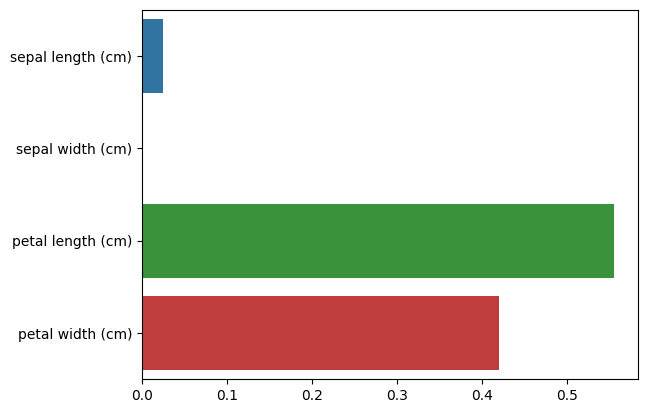

In [4]:
#feature_importance_속성을 가져와 피처별로 중요도값을 매핑하고 막대그래프 표현
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}:{1:3f}'.format(name,value))

#feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

*  petal_length 가 가장 피처 중요도가 높다
* 결정트리는 알고리즘이 직관적이라 시각적 표현방법이 여러가지 존재한다. 규칙트리의 시각화와 feature_importances_ 속성을 통해 알고리즘 동작을 직관적으로 이해할 수 있다.

###**결정트리 과적합**
결정트리가 어떻게 학습데이터를 분할해 예측을 수행할 수 있는지와 이로인한 과적합 문제를 시각화해 알아본다.

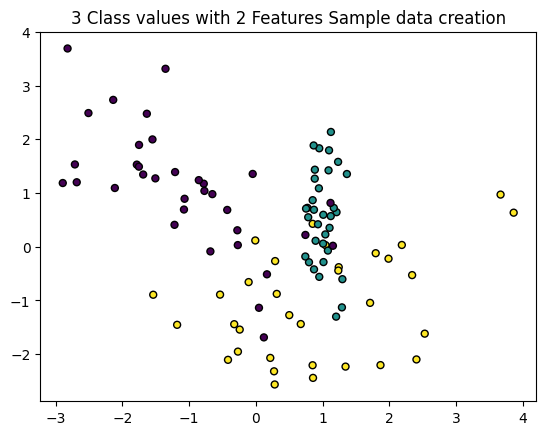

In [5]:
# 2개의 피처가 3가지 유형의 클래스값을 가지는 데이터 세트를 만들고 이를 그래프형태로 시각화한다
#반환되는 객체는 피처데이터세트와 클래스 레이블 데이터 세트

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지유형의 분류샘플 데이터 생성
X_features,y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)
 
#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른색깔로 표시
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,edgecolor='k')



1.   결정트리 생성에 제약이 없도록 결정트리의 하이퍼 파라미터를 디폴트로 한뒤, 결정트리 모델이 어떠한 결정기준을 가지고 분할하면서 데이터를 분류하는지 확인인
2.   이를위해 별도의 함수인 visulaize_boundary()를 생성




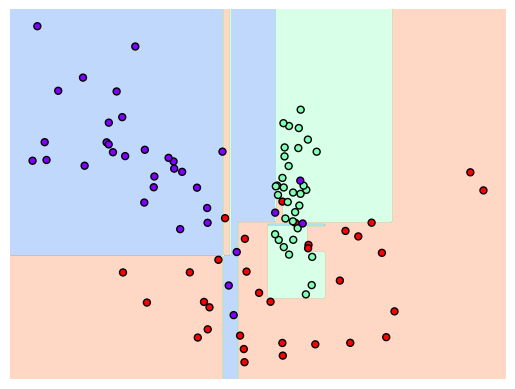

In [6]:
#하이퍼파라미터가 디폴트인 Classifier를 학습하고 결정기준 경계를 시각화
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성제약 없는 결정트리의 학습과 결정 경계 시각화
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    

dt_clf=DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

* 이상치까지 분류하기위해 분할자주발생>경계생성>예측 정확도감소
* min_samples_leaf하이퍼 파라미터 조절


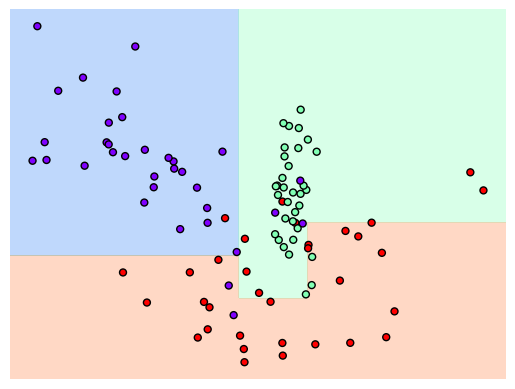

In [7]:
# min_samples_leaf=6으로 트리 생성 조건 제약한 결정 경계 시각화

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않고 일반화된 분류규칙에 따라 분류되었음.


###**03앙상블 학습**
####앙상블 학습 개요
* 정형데이터의 분류나 회귀분야에서 예측성능이 뛰어난 모델을 생성할 수 있음
* 보팅, 배깅, 부스팅 학습유형 존재
> * 보팅: 여러 ML알고리즘이 같은 데이터에 대해 학습하고 예측한 결과를 보팅을 통해 결과선정
> * 배깅: 단일 ML알고리즘으로 여러 분류기가 학습으로 개별예측
>* 부스팅 : 여러 분류기가 가중치를 부여하면서 학습과 예측을 진행
* 랜덤포레스트 알고리즘: 대표적인 배깅방식
#### 하드보팅과 소프트보팅
* 하드보팅
> 예측한 결괏값중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값
* 소프트보팅-일반적 보팅
> 분류기들의 레이블값 결정확률을 더하여 평균중 확률이 가장 높은 레이블값을 최종 보팅 결과값으로 선정
#### 보팅분류기
VotingClassifier 클래스

In [8]:
# load_breast_cancer()함수로 위스콘신 유방암 데이터 세트 생성
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


* 로지스틱회귀와 KNN을 기반으로 소프트 보팅방식 분류기 생성하기-VotingClassifier클래스로 보팅 분류기 생성
* 생성인자로 estimators와 voting값을 입력받는다.


In [10]:
#개별 모델은 로지스틱회귀와 KNN
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

#개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')
X_train,X_test,y_train, y_test=train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train,y_train)
pred=vo_clf.predict(X_test)
print('voting 분류기 정확도:{0:4f}'.format(accuracy_score(y_test,pred)))

#개별 모델의 학습/예습/평가
classifiers=[lr_clf,knn_clf]
for classifier in classifiers:
  classifier.fit(X_train,y_train)
  pred=classifier.predict(X_test)
  class_name=classifier.__class__.__name__
  print('{0}정확도: {1:.4f}'.format(class_name,accuracy_score(y_test,pred)))

voting 분류기 정확도:0.947368
LogisticRegression정확도: 0.9386
KNeighborsClassifier정확도: 0.9386


* 보깅과 스태킹은 서로다른 알고리즘을 기반
* 배깅과 부스팅은 대부분 결정트리 알고리즘을 기반
###**04 랜덤포레스트**
#### 랜덤 포레스트의 개요 및 실습
* 배깅의 대표적 알고리즘
* 여러개의 결정트리 분류기가 배깅방식으로 데이터를 샘플링해 개별적 학습을 하고 보팅을 통해 예측결정
* 여러개 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑이라고 한다. 
* 여러 데이터세트에 결정트리 분류기를 적용한것이 랜덤포레스트

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

NameError: ignored

####랜덤 포레스트 하이퍼 파라미터 및 튜닝 
* GridSearchCV를 이용해 랜덤포레스트의 하이퍼 파라미터 튜닝하기
> n_estimators=100, CV=2로 설정해 최적 하이퍼 파라미터를 구하고 n_estimators를 증가시켜 예측성능을 평가한다
* CPU 병렬 처리 
> 멀티 코어 환경에서 RandomForestClassifier, GridSearchCV 생성 시 n_jobs=-1 를 추가하면면  CPU 코어 학습가능

In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9451


n_estimators를 300으로 증가시키고 최적화 하이퍼 파라미터로 다시 RandomForestClassifier를 학습시킨뒤 데이터 세트에서 예측성능을 측정한다.

In [14]:
rf_clf1=RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_leaf=8,min_samples_split=8,random_state=0)
rf_clf1.fit(X_train,y_train)
pred=rf_clf1.predict(X_test)
print('예측정확도:{0:4f}'.format(accuracy_score(y_test,pred)))

예측정확도:0.938596


In [22]:
#피처중요도 막대그래프로 표시
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

AttributeError: ignored

###**05 GBM**
#### GBM의 개요 및 실습
* 에이다부스트: 오류데이터에 가중치를 부여하며 부스팅을 수행하는 대표적 알고리즘
* 가중치 업데이트를 경사 하강법을 이용하는 점에서 GBM과 에이다부스트의 차이점

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

NameError: ignored

일반적으로 GBM이 랜덤포레스트보다 예측성능이 뛰어난 경우가 많다.
#### GBM 하이퍼 파라미터 및 튜닝
* loss: 경사 하강법에서 사용할 비용함수 지정
* learning_rate: GBM이 학습을 진행할때마다 적용하는 학습률
* n_estimators: weak learner의 개수
* subsample: weak learner가 학습에 사용하는 데이터의 샘플링비율율

In [30]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

NameError: ignored

In [25]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9386


GBM은 과적합에도 뛰어난 예측 성능을 가진 알고리즘